In [100]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor, RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import re
import random

# Suppress warnings
import warnings

warnings.filterwarnings("ignore")

## Loading the dataset

1. Bowling: `bowling_data.csv`
2. Player Name and ID Map: `player_team_name_id.csv`

In [101]:
bowling_df = pd.read_csv("final_data/bowling_data.csv")
bowling_df

,player_id,overs,maidens,runs,wickets,economy,position,innings,opposition,ground,start_date,odi_number
0,440970,DNB,-,-,-,-,-,1,Kenya,Sharjah,2 Oct 2013,ODI # 3417
1,440970,DNB,-,-,-,-,-,1,Kenya,Sharjah,4 Oct 2013,ODI # 3418
2,440970,DNB,-,-,-,-,-,1,Hong Kong,Kuala Lumpur,1 May 2014,ODI # 3487
3,440970,2.0,0,17,0,8.50,6,2,U.A.E.,Kuala Lumpur,2 May 2014,ODI # 3488
4,440970,DNB,-,-,-,-,-,2,Zimbabwe,Bulawayo,18 Jul 2014,ODI # 3503
...,...,...,...,...,...,...,...,...,...,...,...,...
9326,793007,10.0,0,86,2,8.60,2,1,South Africa,Delhi,7 Oct 2023,ODI # 4661
9327,793007,9.2,0,60,2,6.42,2,2,Pakistan,Hyderabad,10 Oct 2023,ODI # 4665
9328,793007,9.0,2,38,3,4.22,2,2,Australia,Lucknow,16 Oct 2023,ODI # 4671
9329,793007,9.4,1,49,4,5.06,1,1,Netherlands,Lucknow,21 Oct 2023,ODI # 4676


In [102]:
player_data_df = pd.read_csv("final_data/player_team_name_id.csv")
player_data_df

,team_name,player_name,player_id
0,Afghanistan,Hashmatullah Shahidi,440970
1,Afghanistan,Rahmanullah Gurbaz,974087
2,Afghanistan,Ibrahim Zadran,921509
3,Afghanistan,Reyaz Hassan,1061090
4,Afghanistan,Rahmat Shah Zurmati,533956
...,...,...,...
145,Sri Lanka,Dunith Wellalage,1152427
146,Sri Lanka,Kasun Rajitha,499594
147,Sri Lanka,Matheesha Pathirana,1194795
148,Sri Lanka,Lahiru Kumara,784375


## Data Preprocessing

In [103]:
bowling_df = bowling_df.merge(player_data_df, on="player_id", how="left")
bowling_df

,player_id,overs,maidens,runs,wickets,economy,position,innings,opposition,ground,start_date,odi_number,team_name,player_name
0,440970,DNB,-,-,-,-,-,1,Kenya,Sharjah,2 Oct 2013,ODI # 3417,Afghanistan,Hashmatullah Shahidi
1,440970,DNB,-,-,-,-,-,1,Kenya,Sharjah,4 Oct 2013,ODI # 3418,Afghanistan,Hashmatullah Shahidi
2,440970,DNB,-,-,-,-,-,1,Hong Kong,Kuala Lumpur,1 May 2014,ODI # 3487,Afghanistan,Hashmatullah Shahidi
3,440970,2.0,0,17,0,8.50,6,2,U.A.E.,Kuala Lumpur,2 May 2014,ODI # 3488,Afghanistan,Hashmatullah Shahidi
4,440970,DNB,-,-,-,-,-,2,Zimbabwe,Bulawayo,18 Jul 2014,ODI # 3503,Afghanistan,Hashmatullah Shahidi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9326,793007,10.0,0,86,2,8.60,2,1,South Africa,Delhi,7 Oct 2023,ODI # 4661,Sri Lanka,Dilshan Madushanka
9327,793007,9.2,0,60,2,6.42,2,2,Pakistan,Hyderabad,10 Oct 2023,ODI # 4665,Sri Lanka,Dilshan Madushanka
9328,793007,9.0,2,38,3,4.22,2,2,Australia,Lucknow,16 Oct 2023,ODI # 4671,Sri Lanka,Dilshan Madushanka
9329,793007,9.4,1,49,4,5.06,1,1,Netherlands,Lucknow,21 Oct 2023,ODI # 4676,Sri Lanka,Dilshan Madushanka


#### Ground Names

In [104]:
# Collect Ground Names

ground_names = bowling_df["ground"].unique().tolist()
ground_names = list(set(ground_names))
ground_names

['Centurion',
 'Nottingham',
 'Chelmsford',
 'King City (NW)',
 'Wankhede',
 'Guwahati',
 'Multan',
 'Dunedin',
 'Adelaide',
 'Doha',
 'Bulawayo',
 'Nelson',
 'Kingston',
 'Cuttack',
 'Dambulla',
 'Lahore',
 'Rawalpindi',
 'Rotterdam',
 'Birmingham',
 'The Hague',
 'Sydney',
 'Bengaluru',
 'Colombo (PSS)',
 'Albion',
 'Queenstown',
 'Galle',
 'Indore',
 'Auckland',
 'Edinburgh',
 'Hambantota',
 'Fatullah',
 "Lord's",
 'Ranchi',
 'Colombo (SSC)',
 'Christchurch',
 'The Oval',
 'North Sound',
 'Manchester',
 'Melbourne',
 'Toronto',
 'Mount Maunganui',
 'Cape Town',
 'Bloemfontein',
 'Hyderabad',
 'Perth',
 'Karachi',
 'Dublin (Malahide)',
 "St George's",
 'Nairobi (Gym)',
 'Brisbane',
 'Chester-le-Street',
 'Bogra',
 'Nagpur',
 'Jamshedpur',
 "St John's",
 'Canberra',
 'Townsville',
 'Sharjah',
 'Basseterre',
 'Harare',
 'Eden Gardens',
 'Dharamsala',
 'Faisalabad',
 'Potchefstroom',
 'Kochi',
 'Dubai (DSC)',
 'Tarouba',
 'Napier',
 'Pallekele',
 'Dublin',
 'Paarl',
 'Wellington',
 'Gro

#### Removing unwanted columns

In [105]:
bowling_df.drop(columns=["odi_number"], inplace=True)
bowling_df

,player_id,overs,maidens,runs,wickets,economy,position,innings,opposition,ground,start_date,team_name,player_name
0,440970,DNB,-,-,-,-,-,1,Kenya,Sharjah,2 Oct 2013,Afghanistan,Hashmatullah Shahidi
1,440970,DNB,-,-,-,-,-,1,Kenya,Sharjah,4 Oct 2013,Afghanistan,Hashmatullah Shahidi
2,440970,DNB,-,-,-,-,-,1,Hong Kong,Kuala Lumpur,1 May 2014,Afghanistan,Hashmatullah Shahidi
3,440970,2.0,0,17,0,8.50,6,2,U.A.E.,Kuala Lumpur,2 May 2014,Afghanistan,Hashmatullah Shahidi
4,440970,DNB,-,-,-,-,-,2,Zimbabwe,Bulawayo,18 Jul 2014,Afghanistan,Hashmatullah Shahidi
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9326,793007,10.0,0,86,2,8.60,2,1,South Africa,Delhi,7 Oct 2023,Sri Lanka,Dilshan Madushanka
9327,793007,9.2,0,60,2,6.42,2,2,Pakistan,Hyderabad,10 Oct 2023,Sri Lanka,Dilshan Madushanka
9328,793007,9.0,2,38,3,4.22,2,2,Australia,Lucknow,16 Oct 2023,Sri Lanka,Dilshan Madushanka
9329,793007,9.4,1,49,4,5.06,1,1,Netherlands,Lucknow,21 Oct 2023,Sri Lanka,Dilshan Madushanka


#### Overs

In [106]:
bowling_df["overs"].unique()

array(['DNB', '2.0', '1.0', 'TDNB', '3.0', '5.0', '1.5', '5.3', '6.0',
       '8.0', '4.0', '1.1', '9.0', '10.0', '9.5', '5.1', '7.0', '8.3',
       '9.4', '6.4', '5.2', '7.1', '4.1', '3.5', '8.2', '8.5', '8.1',
       '7.3', '9.2', '4.4', '4.2', '5.4', '9.3', '8.4', '7.2', '7.5',
       '4.5', '1.4', '3.2', '6.1', '6.2', '0.1', '6.5', '2.4', '0.5',
       '5.5', 'sub', '1.3', '3.1', '9.1', '6.3', '1.2', '0.2', '2.3',
       '2.5', '7.4', '0.4', '2.2', '0.3', '3.3', '4.3'], dtype=object)

In [107]:
# We can notice DNB, TDNB, sub in overs. Drop them

bowling_df.drop(
    bowling_df[bowling_df["overs"].isin(["DNB", "TDNB", "sub"])].index, inplace=True
)
bowling_df["overs"] = bowling_df["overs"].astype(float)
bowling_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5171 entries, 3 to 9330
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   player_id    5171 non-null   int64  
 1   overs        5171 non-null   float64
 2   maidens      5171 non-null   object 
 3   runs         5171 non-null   object 
 4   wickets      5171 non-null   object 
 5   economy      5171 non-null   object 
 6   position     5171 non-null   object 
 7   innings      5171 non-null   object 
 8   opposition   5171 non-null   object 
 9   ground       5171 non-null   object 
 10  start_date   5171 non-null   object 
 11  team_name    5171 non-null   object 
 12  player_name  5171 non-null   object 
dtypes: float64(1), int64(1), object(11)
memory usage: 565.6+ KB


#### Runs

In [108]:
bowling_df["runs"] = bowling_df["runs"].astype(int)
bowling_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5171 entries, 3 to 9330
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   player_id    5171 non-null   int64  
 1   overs        5171 non-null   float64
 2   maidens      5171 non-null   object 
 3   runs         5171 non-null   int64  
 4   wickets      5171 non-null   object 
 5   economy      5171 non-null   object 
 6   position     5171 non-null   object 
 7   innings      5171 non-null   object 
 8   opposition   5171 non-null   object 
 9   ground       5171 non-null   object 
 10  start_date   5171 non-null   object 
 11  team_name    5171 non-null   object 
 12  player_name  5171 non-null   object 
dtypes: float64(1), int64(2), object(10)
memory usage: 565.6+ KB


#### Wickets

In [109]:
bowling_df["wickets"] = bowling_df["wickets"].astype(int)
bowling_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5171 entries, 3 to 9330
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   player_id    5171 non-null   int64  
 1   overs        5171 non-null   float64
 2   maidens      5171 non-null   object 
 3   runs         5171 non-null   int64  
 4   wickets      5171 non-null   int64  
 5   economy      5171 non-null   object 
 6   position     5171 non-null   object 
 7   innings      5171 non-null   object 
 8   opposition   5171 non-null   object 
 9   ground       5171 non-null   object 
 10  start_date   5171 non-null   object 
 11  team_name    5171 non-null   object 
 12  player_name  5171 non-null   object 
dtypes: float64(1), int64(3), object(9)
memory usage: 565.6+ KB


In [110]:
bowling_df["economy"] = bowling_df["economy"].astype(float)
bowling_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5171 entries, 3 to 9330
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   player_id    5171 non-null   int64  
 1   overs        5171 non-null   float64
 2   maidens      5171 non-null   object 
 3   runs         5171 non-null   int64  
 4   wickets      5171 non-null   int64  
 5   economy      5171 non-null   float64
 6   position     5171 non-null   object 
 7   innings      5171 non-null   object 
 8   opposition   5171 non-null   object 
 9   ground       5171 non-null   object 
 10  start_date   5171 non-null   object 
 11  team_name    5171 non-null   object 
 12  player_name  5171 non-null   object 
dtypes: float64(2), int64(3), object(8)
memory usage: 565.6+ KB


#### Innings

In [111]:
bowling_df["innings"] = bowling_df["innings"].astype(int)
bowling_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5171 entries, 3 to 9330
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   player_id    5171 non-null   int64  
 1   overs        5171 non-null   float64
 2   maidens      5171 non-null   object 
 3   runs         5171 non-null   int64  
 4   wickets      5171 non-null   int64  
 5   economy      5171 non-null   float64
 6   position     5171 non-null   object 
 7   innings      5171 non-null   int64  
 8   opposition   5171 non-null   object 
 9   ground       5171 non-null   object 
 10  start_date   5171 non-null   object 
 11  team_name    5171 non-null   object 
 12  player_name  5171 non-null   object 
dtypes: float64(2), int64(4), object(7)
memory usage: 565.6+ KB


In [112]:
bowling_df["maidens"] = bowling_df["maidens"].astype(int)

In [113]:
bowling_df["position"] = bowling_df["position"].astype(int)

In [114]:
# Reset index
bowling_df.reset_index(drop=True, inplace=True)

## Visualization

##### Wickets

In [115]:
highest_wickets = bowling_df.groupby("player_name")["wickets"].sum().reset_index()
highest_wickets.sort_values(by="wickets", ascending=False, inplace=True)
highest_wickets

,player_name,wickets
100,Shakib Al Hasan,314
65,Mitchell Starc,227
111,Tim Southee,214
86,Ravindra Jadeja,211
113,Trent Boult,203
...,...,...
61,Max O'Dowd,0
105,Steve Smith,0
104,Shreyas Iyer,0
74,Najibullah Zadran,0


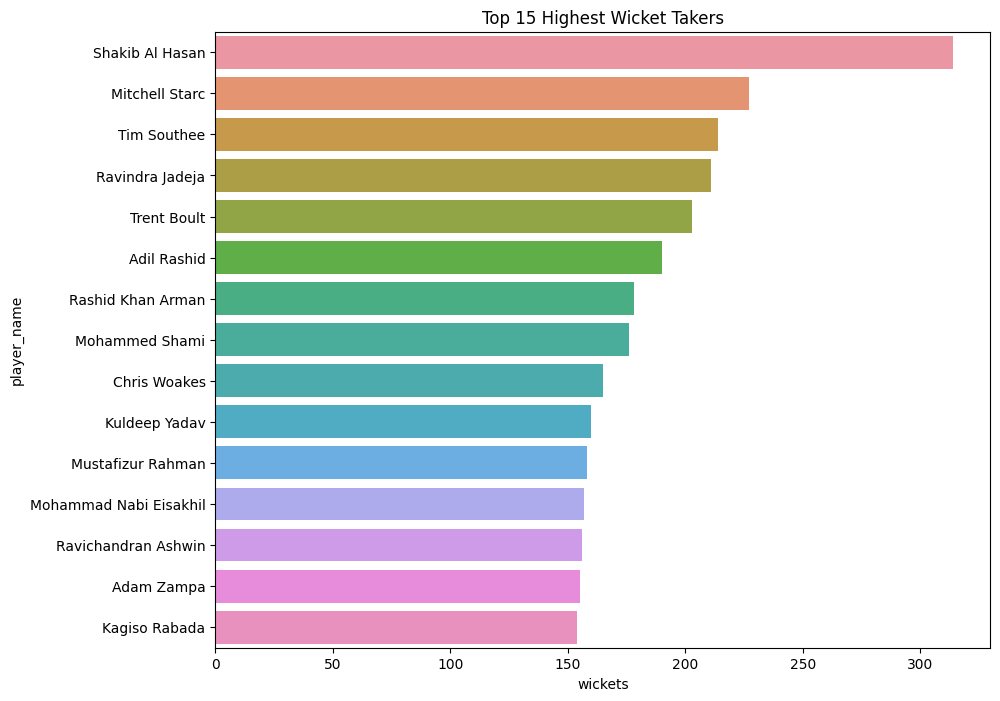

In [116]:
# Horizontal bar plot
plt.figure(figsize=(10, 8))
sns.barplot(x="wickets", y="player_name", data=highest_wickets[:15])
plt.title("Top 15 Highest Wicket Takers")
plt.show()

In [117]:
best_figures = bowling_df.groupby("player_name")["wickets"].max().reset_index()
best_figures.sort_values(by="wickets", ascending=False, inplace=True)
best_figures

,player_name,wickets
111,Tim Southee,7
113,Trent Boult,7
83,Rashid Khan Arman,7
41,Kagiso Rabada,6
11,Chris Woakes,6
...,...,...
61,Max O'Dowd,0
105,Steve Smith,0
104,Shreyas Iyer,0
74,Najibullah Zadran,0


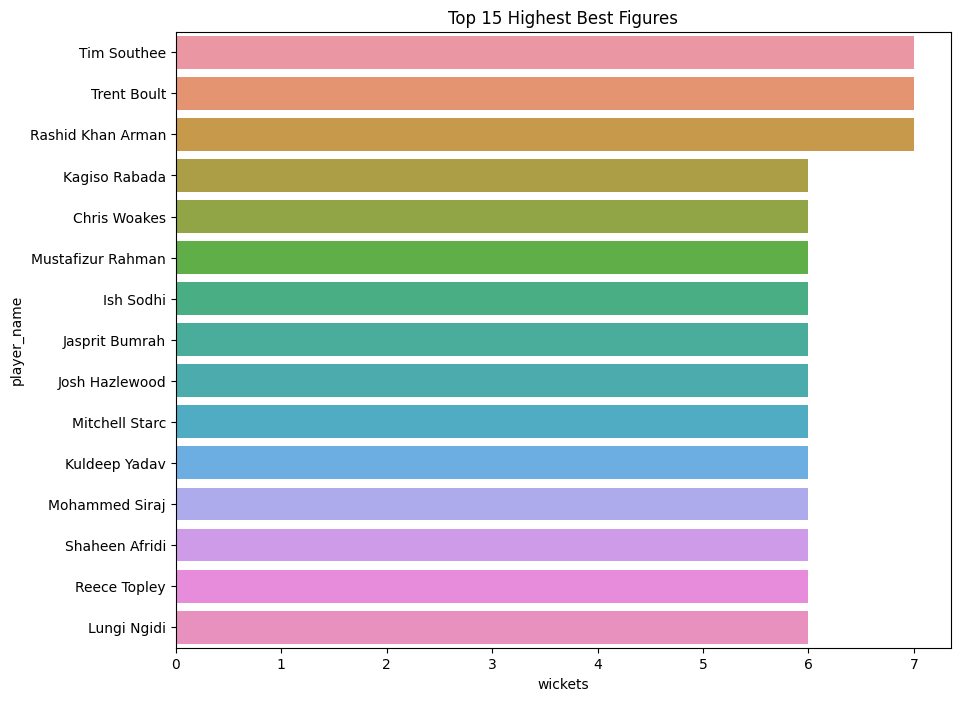

In [118]:
# Horizontal bar plot
plt.figure(figsize=(10, 8))
sns.barplot(x="wickets", y="player_name", data=best_figures[:15])
plt.title("Top 15 Highest Best Figures")
plt.show()

In [119]:
bowling_df

,player_id,overs,maidens,runs,wickets,economy,position,innings,opposition,ground,start_date,team_name,player_name
0,440970,2.0,0,17,0,8.50,6,2,U.A.E.,Kuala Lumpur,2 May 2014,Afghanistan,Hashmatullah Shahidi
1,440970,1.0,0,8,0,8.00,6,2,Zimbabwe,Harare,16 Feb 2017,Afghanistan,Hashmatullah Shahidi
2,533956,3.0,0,10,0,3.33,7,1,Scotland,Sharjah,6 Mar 2013,Afghanistan,Rahmat Shah Zurmati
3,533956,5.0,0,22,0,4.40,6,1,Scotland,Sharjah,8 Mar 2013,Afghanistan,Rahmat Shah Zurmati
4,533956,1.5,1,7,1,3.81,5,1,Kenya,Sharjah,2 Oct 2013,Afghanistan,Rahmat Shah Zurmati
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5166,793007,10.0,0,86,2,8.60,2,1,South Africa,Delhi,7 Oct 2023,Sri Lanka,Dilshan Madushanka
5167,793007,9.2,0,60,2,6.42,2,2,Pakistan,Hyderabad,10 Oct 2023,Sri Lanka,Dilshan Madushanka
5168,793007,9.0,2,38,3,4.22,2,2,Australia,Lucknow,16 Oct 2023,Sri Lanka,Dilshan Madushanka
5169,793007,9.4,1,49,4,5.06,1,1,Netherlands,Lucknow,21 Oct 2023,Sri Lanka,Dilshan Madushanka


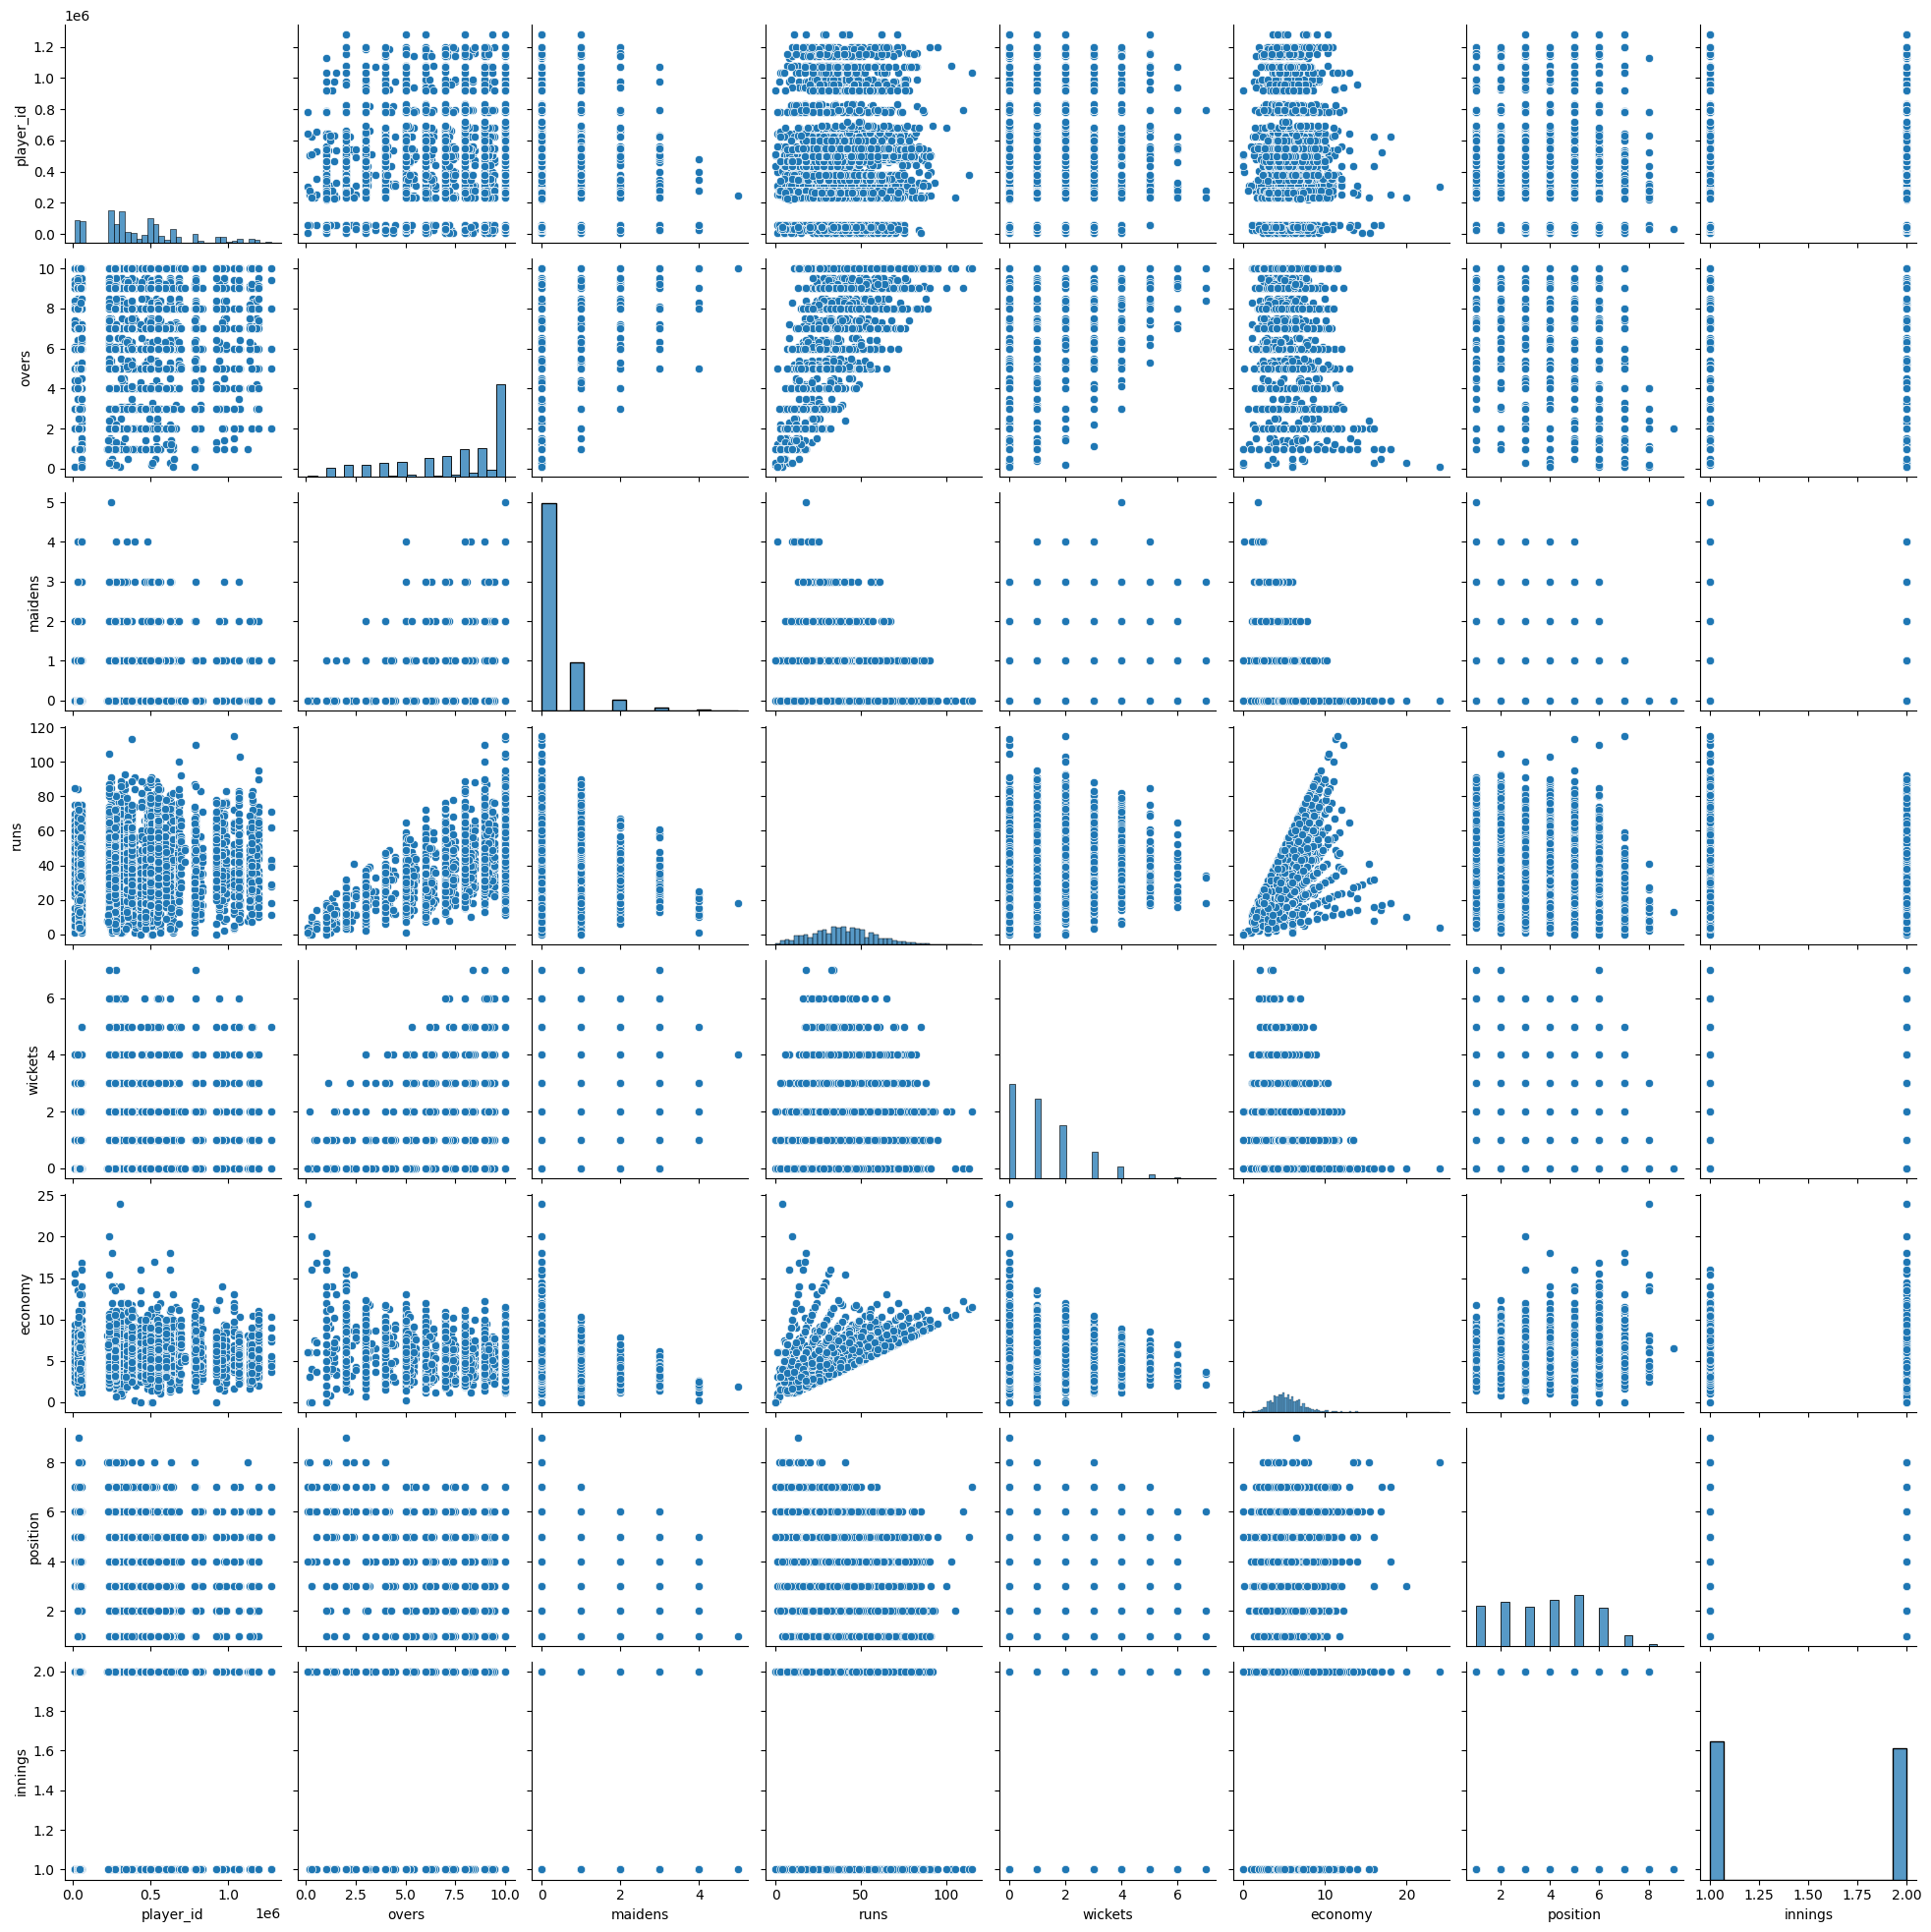

In [120]:
sns.pairplot(bowling_df)

<Axes: >

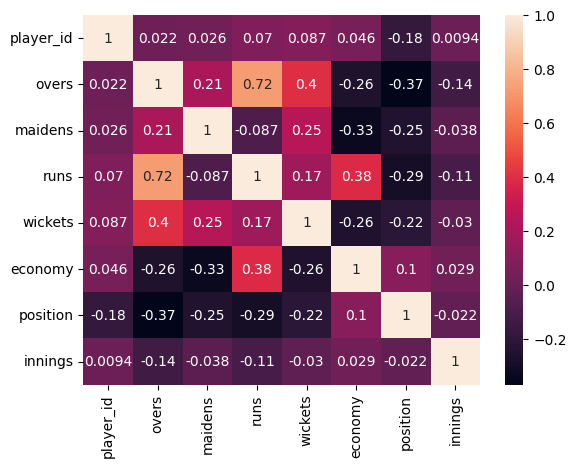

In [121]:
sns.heatmap(bowling_df.corr(), annot=True)

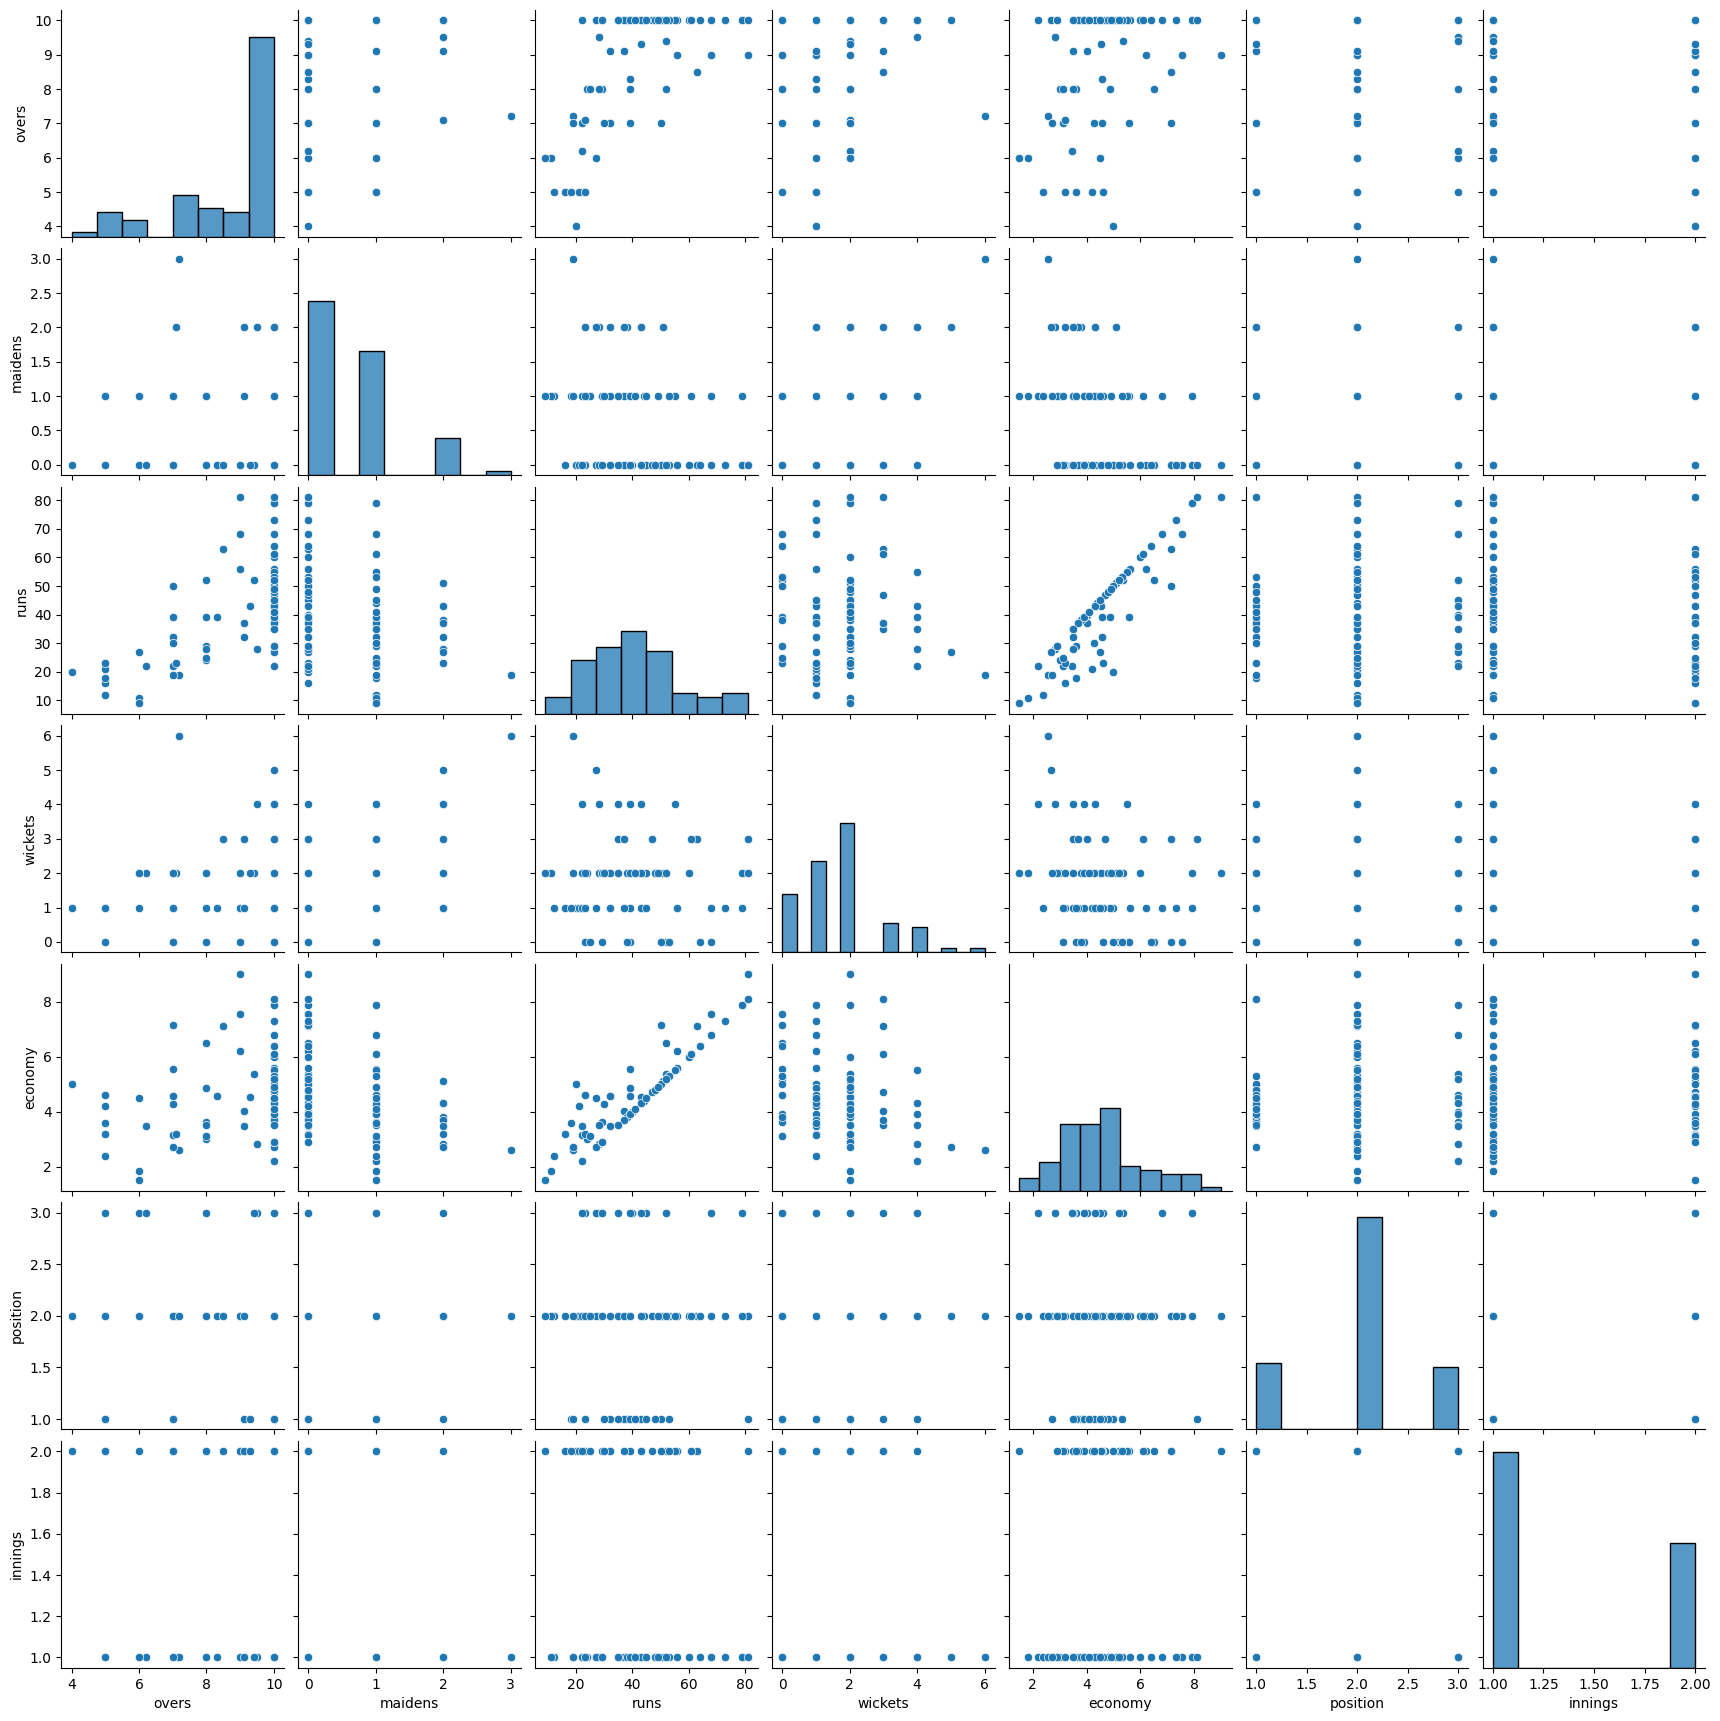

In [122]:
player_bodf = bowling_df[bowling_df["player_name"] == "Jasprit Bumrah"]
player_bodf.drop(columns=["player_name", "player_id"], inplace=True)
sns.pairplot(player_bodf)

## Feature Selection

In [123]:
bowling_df.drop(columns=["player_id", "team_name", 'start_date', 'position'], inplace=True)
bowling_df

,overs,maidens,runs,wickets,economy,innings,opposition,ground,player_name
0,2.0,0,17,0,8.50,2,U.A.E.,Kuala Lumpur,Hashmatullah Shahidi
1,1.0,0,8,0,8.00,2,Zimbabwe,Harare,Hashmatullah Shahidi
2,3.0,0,10,0,3.33,1,Scotland,Sharjah,Rahmat Shah Zurmati
3,5.0,0,22,0,4.40,1,Scotland,Sharjah,Rahmat Shah Zurmati
4,1.5,1,7,1,3.81,1,Kenya,Sharjah,Rahmat Shah Zurmati
...,...,...,...,...,...,...,...,...,...
5166,10.0,0,86,2,8.60,1,South Africa,Delhi,Dilshan Madushanka
5167,9.2,0,60,2,6.42,2,Pakistan,Hyderabad,Dilshan Madushanka
5168,9.0,2,38,3,4.22,2,Australia,Lucknow,Dilshan Madushanka
5169,9.4,1,49,4,5.06,1,Netherlands,Lucknow,Dilshan Madushanka


In [124]:
bodf_copy = bowling_df.copy()
bodf_copy

,overs,maidens,runs,wickets,economy,innings,opposition,ground,player_name
0,2.0,0,17,0,8.50,2,U.A.E.,Kuala Lumpur,Hashmatullah Shahidi
1,1.0,0,8,0,8.00,2,Zimbabwe,Harare,Hashmatullah Shahidi
2,3.0,0,10,0,3.33,1,Scotland,Sharjah,Rahmat Shah Zurmati
3,5.0,0,22,0,4.40,1,Scotland,Sharjah,Rahmat Shah Zurmati
4,1.5,1,7,1,3.81,1,Kenya,Sharjah,Rahmat Shah Zurmati
...,...,...,...,...,...,...,...,...,...
5166,10.0,0,86,2,8.60,1,South Africa,Delhi,Dilshan Madushanka
5167,9.2,0,60,2,6.42,2,Pakistan,Hyderabad,Dilshan Madushanka
5168,9.0,2,38,3,4.22,2,Australia,Lucknow,Dilshan Madushanka
5169,9.4,1,49,4,5.06,1,Netherlands,Lucknow,Dilshan Madushanka


#### One Hot Encoding

In [125]:
# Encoding team names with dummies. One hot encoding

dummy_encoded_bodf = pd.get_dummies(
    bowling_df[["player_name", "opposition", "ground"]], prefix=""
).astype(int)
dummy_encoded_bodf.rename(columns=lambda x: re.sub(r"_v", "", x), inplace=True)
dummy_encoded_bodf.rename(columns=lambda y: re.sub(r"_", "", y), inplace=True)
dummy_encoded_bodf.astype(float)

,Abdul Rahman Rahmani,Adam Zampa,Adil Rashid,Aiden Markram,Andile Phehlukwayo,Aryan Dutt,Azmatullah Omarzai,Bas de Leede,Ben Stokes,Cameron Green,...,The Oval,Thiruvananthapuram,Toronto,Townsville,Utrecht,Vadodara,Visakhapatnam,Wankhede,Wellington,Whangarei
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5166,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5167,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5168,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5169,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [126]:
merged_bodf = pd.concat([dummy_encoded_bodf, bodf_copy], axis="columns")
merged_bodf.describe()

,Abdul Rahman Rahmani,Adam Zampa,Adil Rashid,Aiden Markram,Andile Phehlukwayo,Aryan Dutt,Azmatullah Omarzai,Bas de Leede,Ben Stokes,Cameron Green,...,Visakhapatnam,Wankhede,Wellington,Whangarei,overs,maidens,runs,wickets,economy,innings
count,5171.000000,5171.000000,5171.000000,5171.000000,5171.000000,5171.000000,5171.000000,5171.000000,5171.000000,5171.000000,...,5171.000000,5171.000000,5171.000000,5171.000000,5171.000000,5171.000000,5171.000000,5171.000000,5171.000000,5171.000000
mean,0.000580,0.017405,0.023980,0.004641,0.013730,0.005802,0.003481,0.005415,0.017018,0.004061,...,0.006188,0.011410,0.015278,0.000967,7.442990,0.293560,39.150261,1.247341,5.426132,1.486946
std,0.024082,0.130787,0.153001,0.067975,0.116381,0.075954,0.058903,0.073393,0.129351,0.063603,...,0.078430,0.106216,0.122666,0.031083,2.754851,0.609146,17.692649,1.259137,1.910527,0.499878
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,27.000000,0.000000,4.140000,1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,8.000000,0.000000,39.000000,1.000000,5.200000,1.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,10.000000,0.000000,51.000000,2.000000,6.490000,2.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,10.000000,5.000000,115.000000,7.000000,24.000000,2.000000


In [127]:
final_bodf = merged_bodf.drop(["player_name", "opposition", "ground"], axis="columns")
final_bodf

,Abdul Rahman Rahmani,Adam Zampa,Adil Rashid,Aiden Markram,Andile Phehlukwayo,Aryan Dutt,Azmatullah Omarzai,Bas de Leede,Ben Stokes,Cameron Green,...,Visakhapatnam,Wankhede,Wellington,Whangarei,overs,maidens,runs,wickets,economy,innings
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2.0,0,17,0,8.50,2
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1.0,0,8,0,8.00,2
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,3.0,0,10,0,3.33,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,5.0,0,22,0,4.40,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1.5,1,7,1,3.81,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5166,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,10.0,0,86,2,8.60,1
5167,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,9.2,0,60,2,6.42,2
5168,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,9.0,2,38,3,4.22,2
5169,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,9.4,1,49,4,5.06,1


## Model Building

In [128]:
model_dict = {}

In [129]:
#	overs	maidens	runs	wickets	economy	position	innings	opposition	ground	player_name

player_bodf = final_bodf[[ "Jasprit Bumrah", "Australia", "Chennai", "overs", "maidens", "runs", "wickets", "economy"]]
player_bodf

,Jasprit Bumrah,Australia,Chennai,overs,maidens,runs,wickets,economy
0,0,0,0,2.0,0,17,0,8.50
1,0,0,0,1.0,0,8,0,8.00
2,0,0,0,3.0,0,10,0,3.33
3,0,0,0,5.0,0,22,0,4.40
4,0,0,0,1.5,1,7,1,3.81
...,...,...,...,...,...,...,...,...
5166,0,0,0,10.0,0,86,2,8.60
5167,0,0,0,9.2,0,60,2,6.42
5168,0,1,0,9.0,2,38,3,4.22
5169,0,0,0,9.4,1,49,4,5.06


In [130]:
X = player_bodf.drop(["economy"], axis="columns")
y = player_bodf["economy"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)

#### Linear Regression

In [131]:
model = LinearRegression()
model.fit(X_train, y_train)
model_dict["LinearRegression"] = model.score(X_test, y_test)
model.score(X_test, y_test)

0.7098046140628752

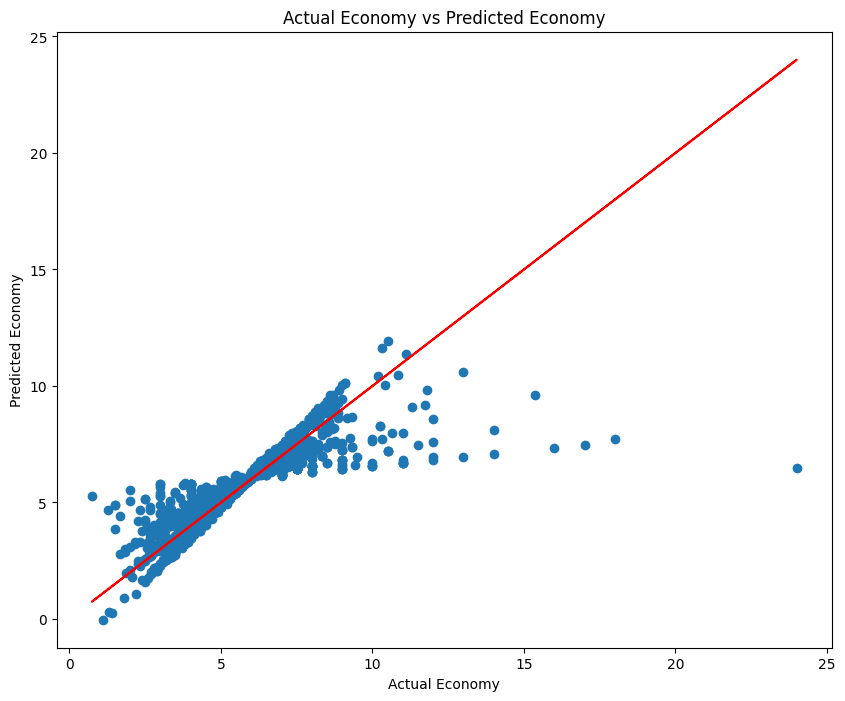

In [132]:
y_pred = model.predict(X_test)

# plot the predicted values along with the actual values
plt.figure(figsize=(10, 8))
plt.scatter(y_test, y_pred)
plt.plot(y_test, y_test, "r")
plt.xlabel("Actual Economy")
plt.ylabel("Predicted Economy")
plt.title("Actual Economy vs Predicted Economy")
plt.show()

#### Bayesian Regression

In [133]:
model = BayesianRidge()
model.fit(X_train, y_train)
model_dict["BayesianRidge"] = model.score(X_test, y_test)
model.score(X_test, y_test)

0.7098350365949091

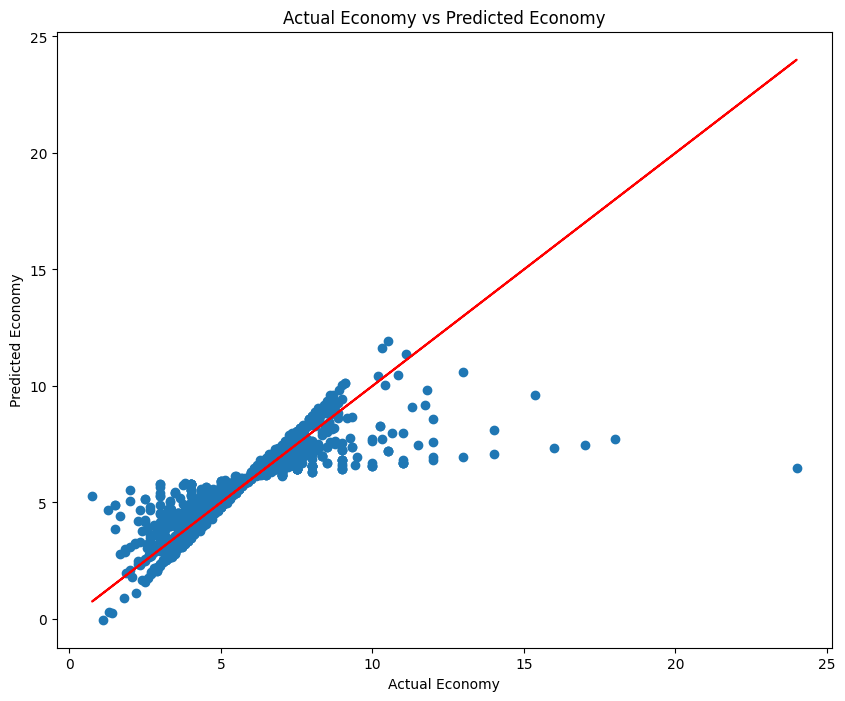

In [134]:
y_pred = model.predict(X_test)

# plot the predicted values along with the actual values
plt.figure(figsize=(10, 8))
plt.scatter(y_test, y_pred)
plt.plot(y_test, y_test, "r")
plt.xlabel("Actual Economy")
plt.ylabel("Predicted Economy")
plt.title("Actual Economy vs Predicted Economy")
plt.show()

#### K Nearest Neighbors Regression

In [135]:
# KNN
model = KNeighborsRegressor()
model.fit(X_train, y_train)
model_dict['KNeighborsRegressor'] = model.score(X_test, y_test)
model.score(X_test, y_test)

0.8572184754540226

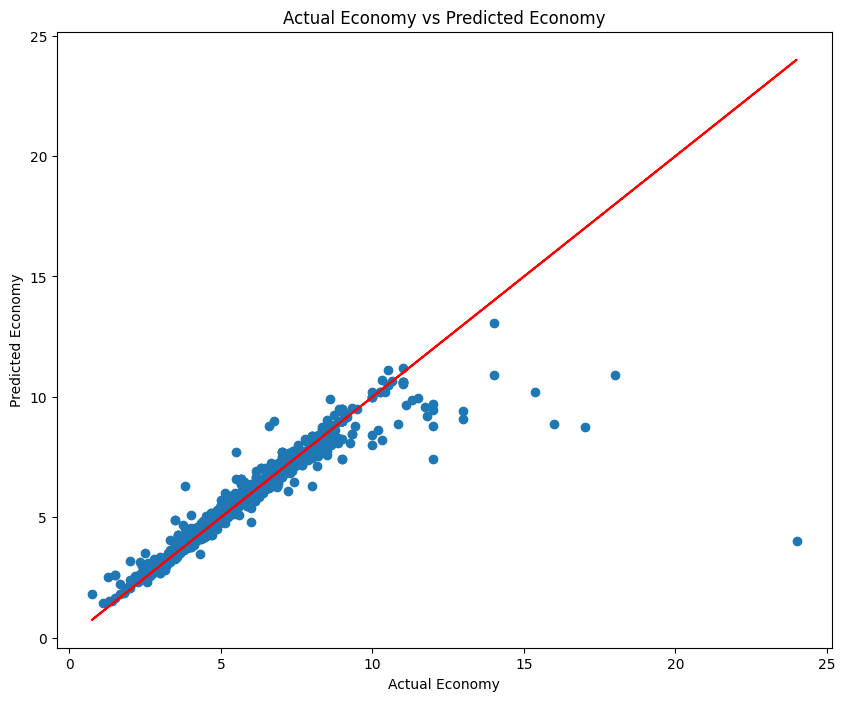

In [136]:
y_pred = model.predict(X_test)

# plot the predicted values along with the actual values
plt.figure(figsize=(10, 8))
plt.scatter(y_test, y_pred)
plt.plot(y_test, y_test, "r")
plt.xlabel("Actual Economy")
plt.ylabel("Predicted Economy")
plt.title("Actual Economy vs Predicted Economy")
plt.show()

#### Gaussian Processes Regression (GPR)

In [137]:
# Gaussian Processes

model = GaussianProcessRegressor()
model.fit(X_train, y_train)
model_dict["GaussianProcessRegressor"] = model.score(X_test, y_test)
model.score(X_test, y_test)

0.660405874484789

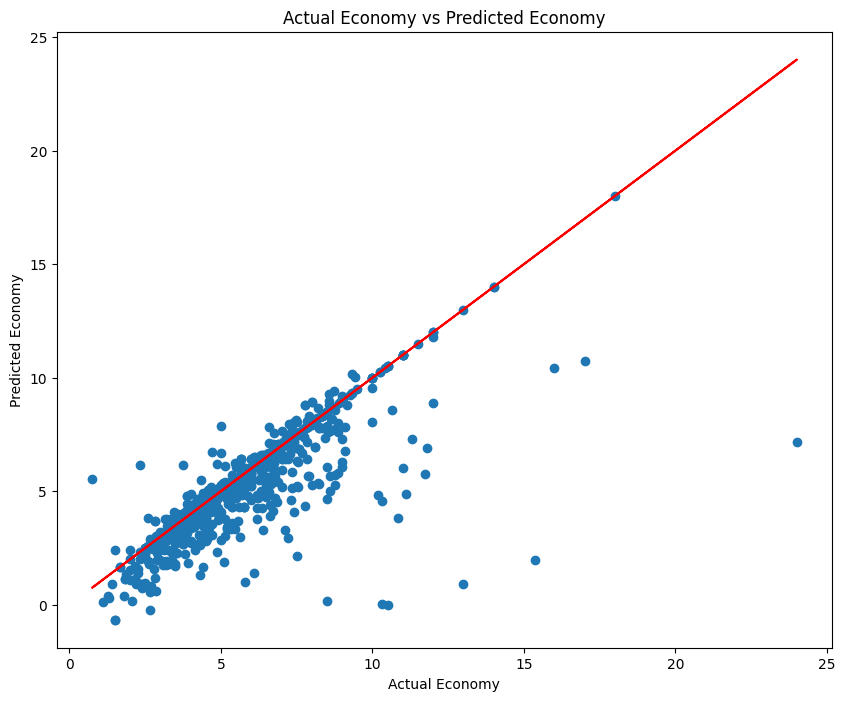

In [138]:
y_pred = model.predict(X_test)

# plot the predicted values along with the actual values
plt.figure(figsize=(10, 8))
plt.scatter(y_test, y_pred)
plt.plot(y_test, y_test, "r")
plt.xlabel("Actual Economy")
plt.ylabel("Predicted Economy")
plt.title("Actual Economy vs Predicted Economy")
plt.show()

#### Decision Tree Regression

In [139]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)
model_dict["DecisionTreeRegressor"] = model.score(X_test, y_test)
model.score(X_test, y_test)

0.9362206110417048

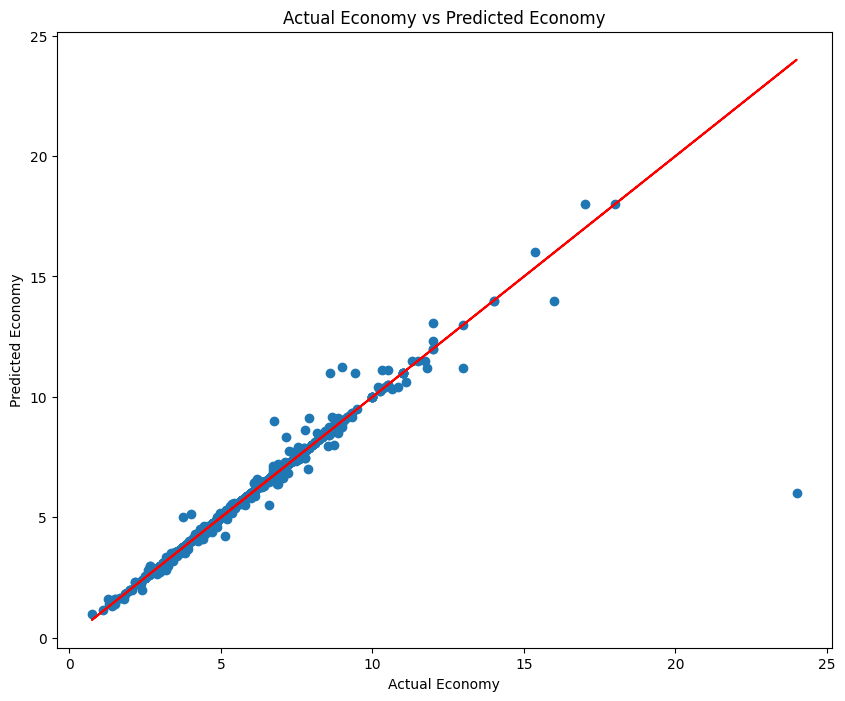

In [140]:
y_pred = model.predict(X_test)

# plot the predicted values along with the actual values
plt.figure(figsize=(10, 8))
plt.scatter(y_test, y_pred)
plt.plot(y_test, y_test, "r")
plt.xlabel("Actual Economy")
plt.ylabel("Predicted Economy")
plt.title("Actual Economy vs Predicted Economy")
plt.show()

### Ensemble Methods

#### Gradient Boosting Regression

In [141]:
model = GradientBoostingRegressor()
model.fit(X_train, y_train)
model_dict["GradientBoostingRegressor"] = model.score(X_test, y_test)
model.score(X_test, y_test)

0.9322427051100313

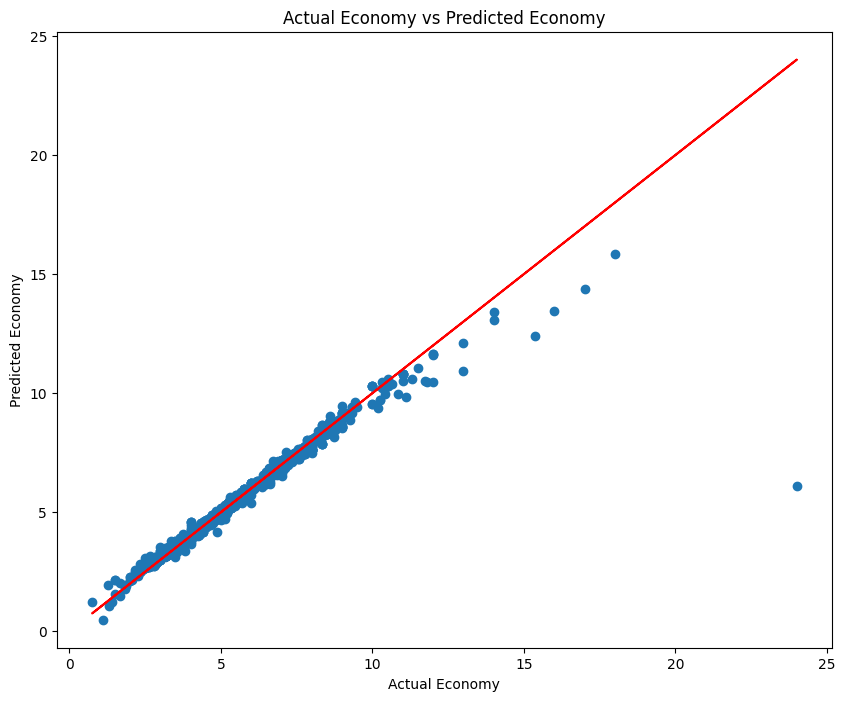

In [142]:
y_pred = model.predict(X_test)

# plot the predicted values along with the actual values
plt.figure(figsize=(10, 8))
plt.scatter(y_test, y_pred)
plt.plot(y_test, y_test, "r")
plt.xlabel("Actual Economy")
plt.ylabel("Predicted Economy")
plt.title("Actual Economy vs Predicted Economy")
plt.show()

#### AdaBoost Regression

In [143]:
model = AdaBoostRegressor()
model.fit(X_train, y_train)
model_dict["AdaBoostRegressor"] = model.score(X_test, y_test)
model.score(X_test, y_test)

0.5465170852669667

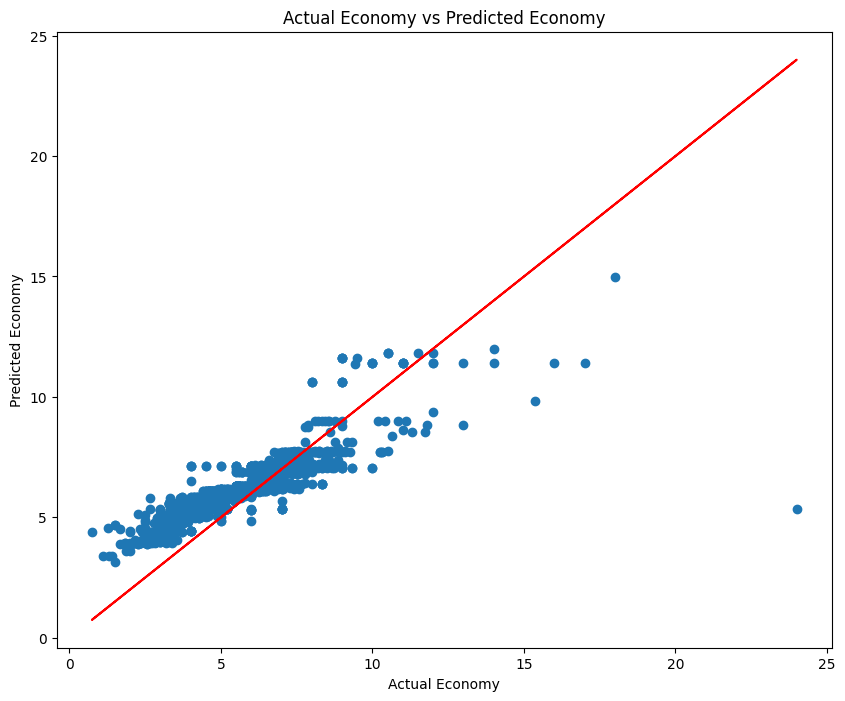

In [144]:
y_pred = model.predict(X_test)

# plot the predicted values along with the actual values
plt.figure(figsize=(10, 8))
plt.scatter(y_test, y_pred)
plt.plot(y_test, y_test, "r")
plt.xlabel("Actual Economy")
plt.ylabel("Predicted Economy")
plt.title("Actual Economy vs Predicted Economy")
plt.show()

#### Bagging Regression

In [145]:
model = BaggingRegressor()
model.fit(X_train, y_train)
model_dict["BaggingRegressor"] = model.score(X_test, y_test)
model.score(X_test, y_test)

0.9325329788354159

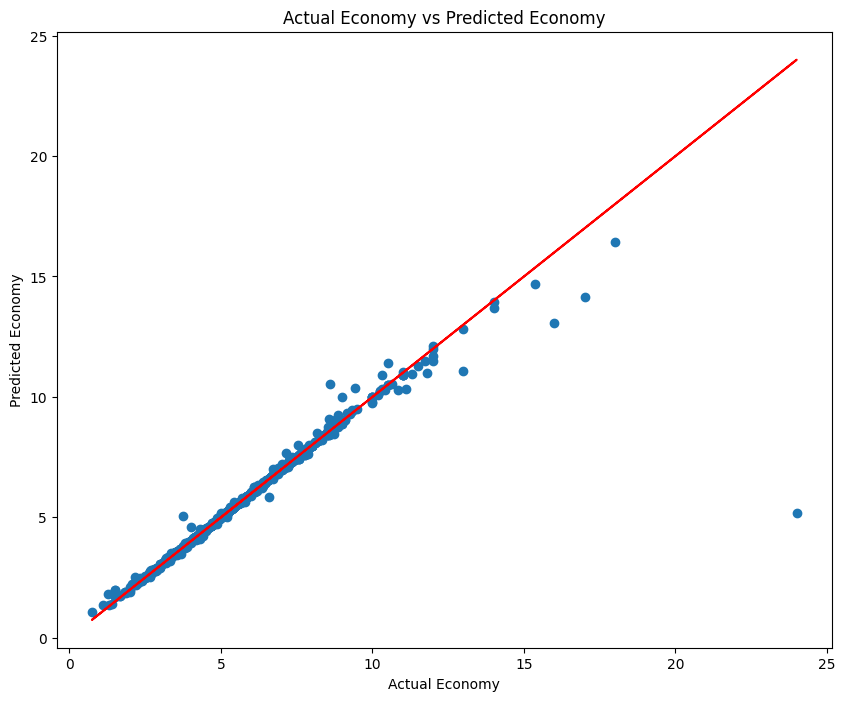

In [146]:
y_pred = model.predict(X_test)

# plot the predicted values along with the actual values
plt.figure(figsize=(10, 8))
plt.scatter(y_test, y_pred)
plt.plot(y_test, y_test, "r")
plt.xlabel("Actual Economy")
plt.ylabel("Predicted Economy")
plt.title("Actual Economy vs Predicted Economy")
plt.show()

#### Random Forest Regression

In [147]:
model = RandomForestRegressor()
model.fit(X_train, y_train)
model_dict["RandomForestRegressor"] = model.score(X_test, y_test)
model.score(X_test, y_test)

0.9358491608226035

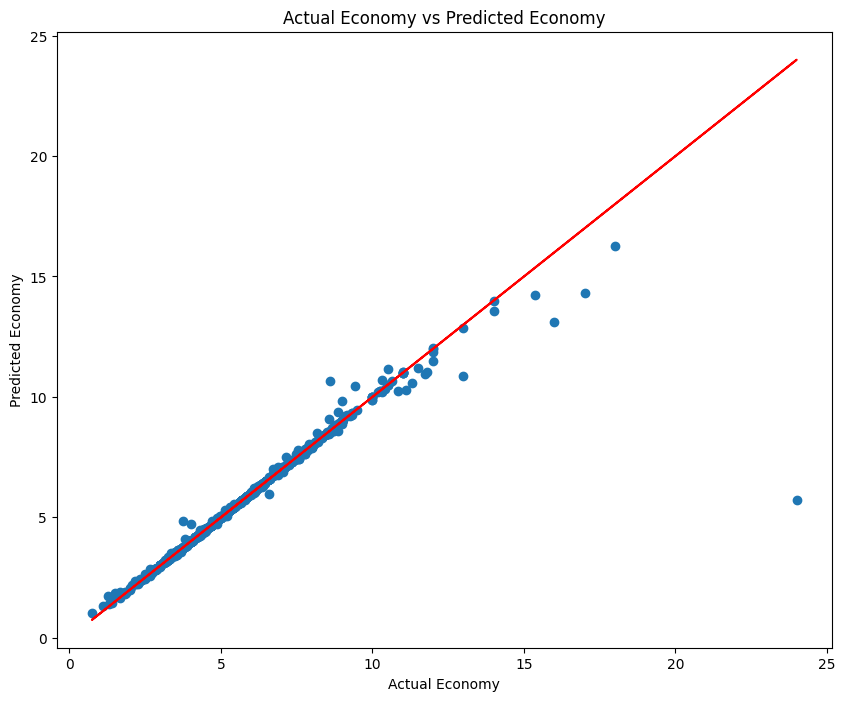

In [148]:
y_pred = model.predict(X_test)

# plot the predicted values along with the actual values
plt.figure(figsize=(10, 8))
plt.scatter(y_test, y_pred)
plt.plot(y_test, y_test, "r")
plt.xlabel("Actual Economy")
plt.ylabel("Predicted Economy")
plt.title("Actual Economy vs Predicted Economy")
plt.show()

In [149]:
model_dict

{'LinearRegression': 0.7098046140628752,
 'BayesianRidge': 0.7098350365949091,
 'KNeighborsRegressor': 0.8572184754540226,
 'GaussianProcessRegressor': 0.660405874484789,
 'DecisionTreeRegressor': 0.9362206110417048,
 'GradientBoostingRegressor': 0.9322427051100313,
 'AdaBoostRegressor': 0.5465170852669667,
 'BaggingRegressor': 0.9325329788354159,
 'RandomForestRegressor': 0.9358491608226035}

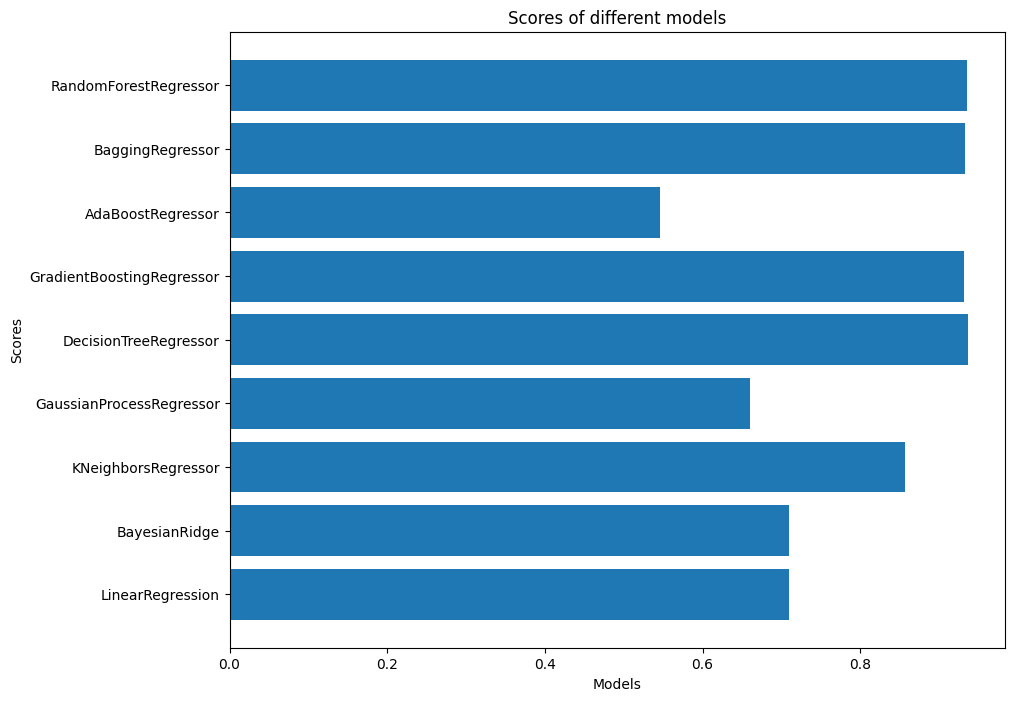

In [150]:
# Plotting the scores
plt.figure(figsize=(10, 8))
plt.barh(list(model_dict.keys()), list(model_dict.values()))
plt.xlabel("Models")
plt.ylabel("Scores")
plt.title("Scores of different models")
plt.show()

#### Generalising

In [151]:
def build_bowl_model(player_name, opposition_team, ground_name):
    player_bodf = final_bodf[[player_name, opposition_team, ground_name, "overs", "maidens", "runs", "wickets", "economy"]]

    X = player_bodf.drop(["economy"], axis="columns")
    y = player_bodf["economy"]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)

    model_dict = {}

    # Linear Regression
    linear_model = LinearRegression()
    linear_model.fit(X_train, y_train)
    model_dict["LinearRegression"] = {
        "model": linear_model,
        "score": linear_model.score(X_test, y_test),
    }

    # Bayesian Ridge
    bayesian_model = BayesianRidge()
    bayesian_model.fit(X_train, y_train)
    model_dict["BayesianRidge"] = {
        "model": bayesian_model,
        "score": bayesian_model.score(X_test, y_test),
    }

    # KNN
    knn_model = KNeighborsRegressor()
    knn_model.fit(X_train, y_train)
    model_dict["KNeighborsRegressor"] = {
        "model": knn_model,
        "score": knn_model.score(X_test, y_test),
    }

    # Gaussian Processes
    gaussian_model = GaussianProcessRegressor()
    gaussian_model.fit(X_train, y_train)
    model_dict["GaussianProcessRegressor"] = {
        "model": gaussian_model,
        "score": gaussian_model.score(X_test, y_test),
    }

    # Decision Tree
    dt_model = DecisionTreeRegressor()
    dt_model.fit(X_train, y_train)
    model_dict["DecisionTreeRegressor"] = {
        "model": dt_model,
        "score": dt_model.score(X_test, y_test),
    }

    # Gradient Boosting
    gb_model = GradientBoostingRegressor()
    gb_model.fit(X_train, y_train)
    model_dict["GradientBoostingRegressor"] = {
        "model": gb_model,
        "score": gb_model.score(X_test, y_test),
    }

    # AdaBoost
    ada_model = AdaBoostRegressor()
    ada_model.fit(X_train, y_train)
    model_dict["AdaBoostRegressor"] = {
        "model": ada_model,
        "score": ada_model.score(X_test, y_test),
    }

    # Bagging
    bagging_model = BaggingRegressor()
    bagging_model.fit(X_train, y_train)
    model_dict["BaggingRegressor"] = {
        "model": bagging_model,
        "score": bagging_model.score(X_test, y_test),
    }

    # Random Forest
    rf_model = RandomForestRegressor()
    rf_model.fit(X_train, y_train)
    model_dict["RandomForestRegressor"] = {
        "model": rf_model,
        "score": rf_model.score(X_test, y_test),
    }


    best_model = max(model_dict, key=lambda k: model_dict[k]["score"])
    best_model = model_dict[best_model]["model"]

    return model_dict, best_model, X_train, X_test, y_train, y_test, player_bodf


In [152]:
# Performance metrics of the best model
model_dict, best_model, X_train, X_test, y_train, y_test, player_df = build_bowl_model("Ravindra Jadeja", "Australia", "Bengaluru")


y_pred = best_model.predict(X_test)
print("The Best Model is: ", best_model)
print("Mean Squared Error: ", mean_squared_error(y_test, y_pred))
print("Mean Absolute Error: ", mean_absolute_error(y_test, y_pred))
print("R2 Score: ", r2_score(y_test, y_pred))

The Best Model is:  RandomForestRegressor()
Mean Squared Error:  0.025460686372422714
Mean Absolute Error:  0.032768363402063905
R2 Score:  0.9926821353679508


In [153]:
def predict_economy(player_name, opposition_name, ground_name):
    try:
        model_dict, best_model, X_train, X_test, y_train, y_test, player_df = build_bowl_model(player_name, opposition_name, ground_name)

        career_overs_avg = max(player_bodf["overs"].mean() + random.randint(-2, 4), player_bodf["overs"].mean())
        career_maidens_avg = max(player_bodf["maidens"].mean() + random.randint(-1, 2), player_bodf["maidens"].mean())
        career_runs_avg = max(player_bodf["runs"].mean() + random.randint(-10, 20), player_bodf["runs"].mean())
        career_wickets_avg = max(player_bodf["wickets"].mean() + random.randint(-1, 2), player_bodf["wickets"].mean())

        # [player_name, opposition_team, ground_name, "overs", "maidens", "runs", "wickets", "economy"]

        predicted_economy = best_model.predict([[1, 1, 1, career_overs_avg, career_maidens_avg, career_runs_avg, career_wickets_avg]])
        
        return predicted_economy
    
    except Exception as e:
        # Stack trace print
        print(e.with_traceback())
        return -1


In [154]:
career_data_df = pd.read_csv("final_data/player_{team_name_id_role}_with_career_summary_batting.csv")
career_data_df

# Remove NaN
career_data_df.dropna(inplace=True)
career_data_df

,team_name,player_name,player_id,player_role,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,4s,6s
0,Afghanistan,Hashmatullah Shahidi,440970,Top order Batter,2013-2023,70,70,11,2001,97*,33.91,2962,67.55,0,18,5,173,12
1,Afghanistan,Rahmanullah Gurbaz,974087,Wicketkeeper Batter,2021-2023,32,32,1,1182,151,38.12,1349,87.62,5,4,1,107,44
2,Afghanistan,Ibrahim Zadran,921509,Opening Batter,2019-2023,25,25,2,1123,162,48.82,1366,82.21,4,5,2,119,15
3,Afghanistan,Reyaz Hassan,1061090,Batter,2022-2023,5,4,0,120,50,30.00,192,62.50,0,1,0,12,2
4,Afghanistan,Rahmat Shah Zurmati,533956,Allrounder,2013-2023,103,99,4,3481,114,36.64,4902,71.01,5,25,5,300,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,Sri Lanka,Charith Asalanka,784367,Batting Allrounder,2021-2023,47,41,5,1443,110,40.08,1626,88.74,1,10,2,116,28
142,Sri Lanka,Dhananjaya de Silva,465793,Allrounder,2016-2023,88,80,10,1812,93,25.88,2313,78.33,0,10,4,180,15
144,Sri Lanka,Maheesh Theekshana,1138316,Bowler,2021-2023,32,17,6,149,29,13.54,252,59.12,0,0,4,8,2
146,Sri Lanka,Kasun Rajitha,499594,Bowler,2018-2023,32,17,7,103,33,10.30,165,62.42,0,0,3,12,1


In [155]:
# Predict for all Indian players. Use BF, 4s, 6s, SR from career data. Avg them with Mat

# Get all Indian players
players_df = career_data_df[career_data_df["team_name"] == "India"]
players_df

,team_name,player_name,player_id,player_role,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,4s,6s
60,India,Rohit Sharma,34102,Top order Batter,2007-2023,257,249,36,10510,264,49.34,11504,91.35,31,54,16,971,312
61,India,Hardik Pandya,625371,Allrounder,2016-2023,86,61,9,1769,92*,34.01,1603,110.35,0,11,4,132,67
62,India,Shubman Gill,1070173,Opening Batter,2019-2023,39,39,6,2021,208,61.24,1974,102.38,6,10,1,228,42
63,India,Virat Kohli,253802,Top order Batter,2008-2023,287,275,43,13437,183,57.91,14350,93.63,48,69,16,1255,148
64,India,Shreyas Iyer,642519,Top order Batter,2017-2023,53,48,5,1935,113*,45.00,1998,96.84,3,15,1,188,40
65,India,KL Rahul,422108,Wicketkeeper Batter,2016-2023,67,63,13,2507,112,50.14,2885,86.89,6,16,2,196,55
66,India,Ravindra Jadeja,234675,Allrounder,2009-2023,192,129,46,2683,87,32.32,3179,84.39,0,13,6,195,52
67,India,Ravichandran Ashwin,26421,Bowling Allrounder,2010-2023,116,63,20,707,65,16.44,813,86.96,0,1,6,60,7
68,India,Shardul Thakur,475281,Bowler,2017-2023,47,25,6,329,50*,17.31,313,105.11,0,1,1,31,9
69,India,Jasprit Bumrah,625383,Bowler,2016-2023,84,24,13,89,16,8.09,155,57.41,0,0,5,10,1


In [156]:
career_data_df['player_role'].unique()

array(['Top order Batter', 'Wicketkeeper Batter', 'Opening Batter',
       'Batter', 'Allrounder', 'Middle order Batter',
       'Bowling Allrounder', 'Bowler', 'Batting Allrounder'], dtype=object)

In [157]:
players_df['player_role'].unique()

array(['Top order Batter', 'Allrounder', 'Opening Batter',
       'Wicketkeeper Batter', 'Bowling Allrounder', 'Bowler', 'Batter'],
      dtype=object)

# Conclusion

In [158]:
for row in players_df.iterrows():
    if row[1]["player_role"] == "Bowling Allrounder" or row[1]['player_role'] == "Bowler" or row[1]['player_role'] == "Allrounder":
        player_name = row[1]["player_name"]
        team_name = row[1]["team_name"]
        opposition_name = "Sri Lanka"
        ground_name = "Ahmedabad"
        economy = predict_economy(player_name, opposition_name, ground_name)
        print(player_name, ":", economy)

Hardik Pandya : [5.596]
Ravindra Jadeja : [6.014]
Ravichandran Ashwin : [5.8]
Shardul Thakur : [5.4529]
Jasprit Bumrah : [4.0156]
Mohammed Siraj : [4.3]
Kuldeep Yadav : [6.9699]
Mohammed Shami : [5.14]


In [159]:
model_dict, best_model, X_train, X_test, y_train, y_test, player_df = build_bowl_model("Ravindra Jadeja", "Australia", "Bengaluru")

In [160]:
model_scores_df = pd.DataFrame(model_dict)
model_scores_df.drop(["model"], inplace=True)
model_scores_df = model_scores_df.T
model_scores_df.sort_values(by="score", ascending=False, inplace=True)
model_scores_df

,score
RandomForestRegressor,0.995016
BaggingRegressor,0.994887
DecisionTreeRegressor,0.99121
GradientBoostingRegressor,0.986575
KNeighborsRegressor,0.934832
BayesianRidge,0.767856
LinearRegression,0.767761
GaussianProcessRegressor,0.712911
AdaBoostRegressor,0.386555


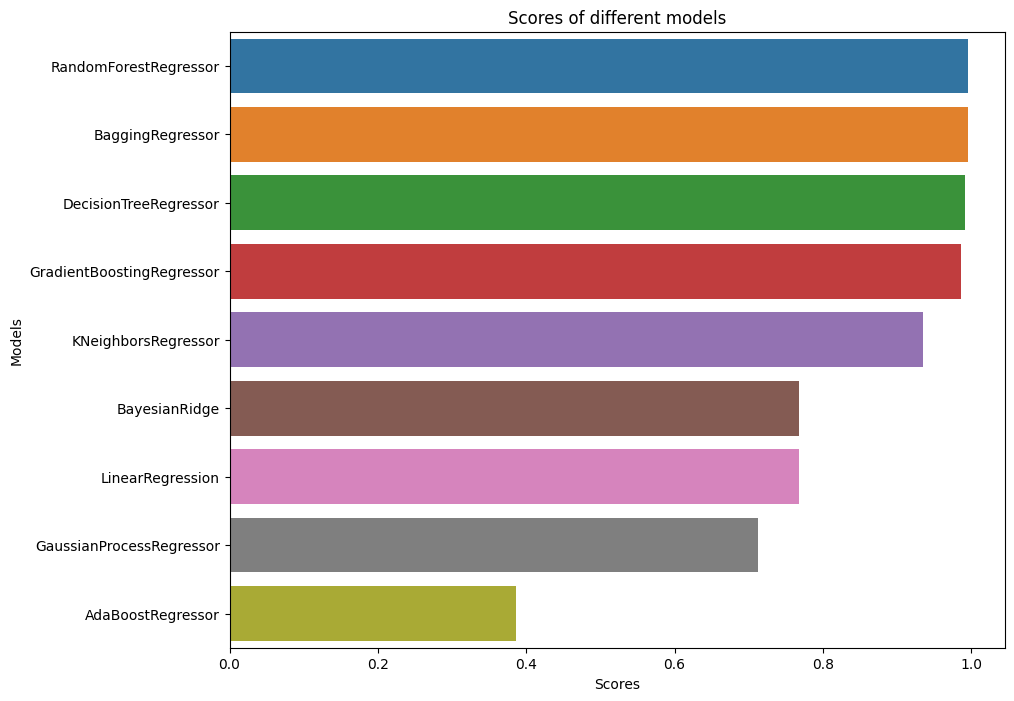

In [161]:
# Plotting the scores Horizontal bar plot

plt.figure(figsize=(10, 8))
sns.barplot(x=model_scores_df["score"], y=model_scores_df.index)
plt.xlabel("Scores")
plt.ylabel("Models")
plt.title("Scores of different models")
plt.show()

# Inference

The Ensemble methods performed the best giving an accuracy of `99.5%` Max. The `AdaBoost Regression` performed the worst with `38%` accuracy. From this we can conclude that the `Ensemble Methods` are the best for predicting the economy taken by a bowler in a match.